# Evaluer les incertitudes dans un TP de physique
## I Position du problème
La physique est une science expérimentale. Les expériences visent à confirmer ou infirmer un modèle théorique. Pour cela il faut pouvoir faire des mesures et les comparer avec des résultats attendus ce qui nécessite de connaitre la confiance accordée aux mesures. 
## II Vocabulaire 
### 1- Erreur systématique
C'est une erreur qui est toujours dans le même sens, elle peut etre liée soit à un protocole expérimental non juste (exempel : montage longue ou courte dérivation pour mesurer une résuistance avec un voltmètre et un ampréremètre) soit à un instrument de mesure faux (mal calibré, endommagée... par exemple une montre qui avance)
Ce type de mesure est difficile à éliminer, il faut améliorer le processus expérimental : protocole plus adapté, instrument de mesure plus juste.
### 2- Erreur aléatoire
Les instruments de mesure et les expérimentateurs n'étaient jamais parfaits, la mesure est intrinsèquement variable et lorsqu'on la répère on ne retrouve pas toujours la même valeur. Il faut alors avoir une idée de la **dispersion de la mesure**, on évaluera un écart-type et on parlera d'incertitude type, qui permettra de valider l'accord entre modèle et théorie avec un **écart normalisé** (cf suite du document pour des définitions de ces 2 notions)
### 3- Incertitude de type A
C'est une incertitude statistique, évaluée à partir d'une série de mesures de la même grandeur. 
### 4-Incertitude de type B
Lorsque la mesure ne peut pas être renouvellée un nombre suffisant de fois, ou lorsque la variabilité de la mesure n'apparait pas (instrument de mesure trop grossier par exemple) on évalue l'incertitude à partir des caractéristiques de l'instrument de mesure.


![test](erreurs.png "")

## Incertitude de type A : évaluation de l'écart-type, loi normale

Lorsque le nombre de mesure augmente, la plupart des mesures suivent une loi normale (on parle de "loi des grands nombres". On caractérise alors la distributionn des mesures par une moyenne et un écart-type.

Pour $N$ mesures indépendantes on montre que la meilleure évaluation des valeurs de la moyenne et de l'écart-type correspond à : #

$$\overline{x}=\frac{\sum_{i=1}^N x_i}{N}$$

$$u(x)=\sqrt{\frac{\sum_{i=1}^N (x_i-\overline{x})^2}{N-1}}$$

C'est ce que calculent les calculatrices ou les tableurs (excell par ex)

Statistiquement 68% des mesures seront comprises dans l'intervalle $[\overline{x}-u(x),\overline{x}+u(x)]$

Il faut élargir l'intervalle à 2 écart-types pour avoir 95% des mesures, c'est ce qu'on fera dans la suite. 

Remarque : en toute rigueur ces résultats ne sont valables que si $N\rightarrow \infty$, sinon il faut multiplier par des coeffcients de Student, ce qui dépasse largement les connaissances que vous devez avoir sur le sujet et au delà de $N=10$ on peut considérer que la règle simple suffit.

Nous allons **simuler une loi normale et construire un histogramme** en utilisant un code Python

moyenne expérimentale = 2.4951082295468665
écart type expériemtal= 0.5016472635773878


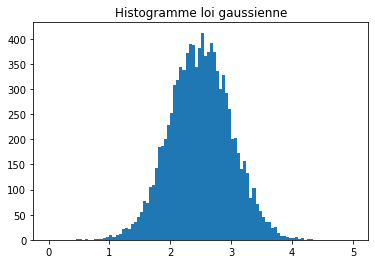

In [1]:
import random
import statistics
import matplotlib.pyplot as plt
x=[]
N=10000 # nombre de mesures
m=2.5 # moyenne visée
sigma=0.5 #écart type visé

for i in range (1,N+1):
    x.append(random.gauss(m,sigma)) #gaussienne(moyenne, écart type)

plt.hist(x,bins=100,range=(0.,5.))
plt.title("Histogramme loi gaussienne")
me=statistics.mean(x)# moyenne expérimentale des x
print('moyenne expérimentale =',me)
sigmae=statistics.pstdev(x) #écart type expériemtal de x
print('écart type expériemtal=',sigmae)

La statistique de la moyenne est plus intéressante, nous allons vérifier numériquement que l'écart type des valeurs moyenne est réduite d'un facteur $\sqrt{N}$. Attention le programme suivant est assez long à exécuter...pour gagner du temps un résultat typique est inséré en dessous.

In [2]:

from math import sqrt

p=200 #nombre de séries de mesures

mo=[]

for j in range(1,p+1):
    x=[]
    for i in range (1,N+1):
        x.append(random.gauss(m,sigma)) #série i : gaussienne(moyenne, écart type)
        mi=statistics.mean(x) #moyenne de la série i
    mo.append(mi)# liste des moyennes expérimentales     
    
print(mo)

plt.hist(mo,bins=50,range=(2.4,2.6)) #histogramme des moyennes
plt.title("histogramme des moyennes")

sigmamoy=statistics.pstdev(mo) #écart type expériemtal des moyennes
sigmamoye=sigma/sqrt(N) # écart type theorique des moyennes
print('écart type expériemtal des moyennes=',sigmamoy,'sigma/sqrt(n)=',sigmamoye)

KeyboardInterrupt: 

écart type expériemtal des moyennes= 0.015724927265771526 sigma/sqrt(N)= 0.015811388300841896

![histogramme](histogramme_moyenne.png "")

On aura donc intérêt à réaliser $N$ fois la même mesure pour réduire l'intervalle de pertinence du résultat, mais cela prend plus de temps...il faudra trouver un compromis acceptable ! 

## Incertitude de type B, loi uniforme
Lorsqu'on ne fait qu'une seule mesure expérimentale notée $m$, ou lorsque les différentes mesures réalisées conduisent toujours au même résultat $m$ car la précision de l'instrument de mesure ne permet pas de mettre en évidence les fluctuations de la mesure, on procède différemment pour évaluer l'incertitude-type.
On considèrera souvent que la mesure est raisonnablement comprise dans un intervalle $m-\Delta, m+\Delta$, la valeur de $\Delta$ s'évalue soit expérimentalemenyt soit à partir des caractéristiques de l'intrument de mesure utilisé., avec une loi de probabilité uniforme.
On admet, et on va vérifier numériquement, que l'incertitude-type est donnée par 
$$u=\frac{\Delta}{\sqrt{3}}$$

moyenne expérimentale = 2.506619730260149
écart type expériemtal= 0.2947876747131415 Delta/sqrt(3) = 0.2886751345948129


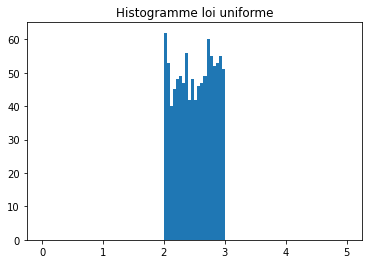

In [ ]:
x=[]

Nu=1000 # nombre de mesures
mu=2.5 # moyenne visée
Delta=0.5 #demi-largeur de l'intervalle


for i in range (1,Nu+1):
    x.append(random.uniform(mu-Delta, mu+Delta)) #distribution uniforme entre m-sigma et m+sigma

plt.hist(x,bins=100,range=(0.,5.))
plt.title("Histogramme loi uniforme")

me=statistics.mean(x)# moyenne expérimentale des x
print('moyenne expérimentale =',me)
sigmae=statistics.pstdev(x) #écart type expériemtal de x
sigmath=sigmau/sqrt(3) #écart type théorique de x
print('écart type expériemtal=',sigmae,'Delta/sqrt(3) =',sigmath
      )

## Propagation des incertitudes
Lorsqu'une grandeur expérimentale $y$ est calculée à partir de la mesure de plusieurs autres grandeurs $x_i$ avec $y=f(x_1, x_2..)$, plusieurs cas se présentent :
- cas favorable, assez courant : une des grandeurs, par exemple $x_1$, est entachée d'une plus grande incertitude que les autres, c'est celle qui va limiter la précision de la mesure et on pourra écrire :

$$u(y)=|\frac{\partial f}{\partial y_1}|u(x_1)$$
- cas plus pénible : plusieurs grandeurs sont antéchées d'erreurs relatives du même ordre de grandeur, alors on montre que 

$$u(y)=\sqrt{\sum_i (\frac{\partial f}{\partial y_i})^2 u(x_i)^2}$$

Il faut donc calculer cette somme.
On peut aussi proécder avec une simulation numérique de MonteCarlo en créant une fluctuation aléatoire des différentes variables $x_i$ pour évaluer l'écart type sur $x$.
Un exemple de ce type de calcul suit, pour la mesure de la focale d'une lentille mince convergente à partir de la position d'un objet et de son image, on voit que la simulation est pertinente par rapport à la formule explicite, on pourra donc utiliser cette méthode lorsque les calculs sont compliqués.


In [ ]:
import numpy as np

Po=[] #liste des positions de l'objet
Pi=[] #liste des positions de l'image
Fo=[] # liste des focales déduites de po et pi

n=100 #nombre de mesures
moy_po=-20.0 # valeur moyenne de po
ecart_type_po=0.1 #ecart type de la mesure de po
moy_pi=20.# valeur moyenne de pi
ecart_type_pi=0.5 #ecart type de la mesure de pi

for i in range (0,n):
    po=random.gauss(moy_po,ecart_type_po) #simule une mesure suivant une loi gaussienne
    pi=random.gauss(moy_pi,ecart_type_pi)
    f=po*pi/(po-pi)
    Po.append(po)
    Pi.append(pi)
    Fo.append(f)
    
f_moy=statistics.mean(Fo)
f_th=moy_po*moy_pi/(moy_po-moy_pi)
print('focale expérimentale=',f_moy,'focale théorique=',f_th)

sigmaf=statistics.pstdev(Fo)#écart type expérimental
sigmaf_th=(np.sqrt((moy_pi**4)*(ecart_type_po)**2+(moy_po**4)*(ecart_type_pi)**2))/((moy_po-moy_pi)**2)# calcul theorique de l'erreur
print('écart-type Montecarlo=', sigmaf,'écart-type théorique=',sigmaf_th)

focale expérimentale= 9.99132173674576 focale théorique= 10.0
écart-type Montecarlo= 0.13134826637026611 écart-type théorique= 0.12747548783981963


## Validation d'un résultat expérimental : écart normalisé
Une fois la mesure faite, il faut donner le résultat sour la forme $$X_{mes}=... \text{ et } u(X)=...$$ 
en ne gardant que 2 chiffres significatifs pour $u(X)$ et en ajustant en conséquence ceux de $X$.
Il reste ensuite à évaluer la pertinence de la mesure en la comparant à la valeur attendue appelée valeur de référence $X_{ref}$ (résultat d'un calcul littéral issu d'un modèle, valeur tabulée...). Comme on a 95% de chances que la valeur exacte soit comprise dans l'intervalle $[X_{mes}-2u(X), X_{mes}+2u(X)]$ on évalue un **écart normalisé** défini par 
$$z=\frac{|X_{mes}-X_{ref}|}{u(X)}$$
on peut valider la mesure (ou le modèle, ou le protocole... tout dépend de ce qu'on considère comme certain !) si 
$$z<2$$
puisqu'alors $X_{ref}$ est dans l'intervalle de confiance à 95%.

On peut de la même façon tester la compatibilité d'une mesure au sein d'un ensemble de mesure en calculant 

$$z=\frac{X-\overline{X}}{u(X)}$$ 
avec le même critère : on doit avoir $z<2$ sinon la mesure n'est pas pertinente.

On peut enfin comparer 2 mesures différentes en définissant 

$$z_{1,2}=\frac{X_1-X_2}{\sqrt{u(X_1)^2+u(X_2)^2}}$$ 

avec toujours le même critère : $z_{1,2}$ doit être inférieure à 2